In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df = pd.read_csv('steam_games.csv')

In [5]:
df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71429 entries, 0 to 71428
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   steam_appid          71429 non-null  int64  
 1   name                 71429 non-null  object 
 2   developers           71429 non-null  object 
 3   publishers           71429 non-null  object 
 4   categories           71429 non-null  object 
 5   genres               71429 non-null  object 
 6   required_age         71429 non-null  int64  
 7   n_achievements       71429 non-null  int64  
 8   platforms            71429 non-null  object 
 9   is_released          71429 non-null  bool   
 10  release_date         71429 non-null  object 
 11  additional_content   71429 non-null  object 
 12  total_reviews        71429 non-null  int64  
 13  total_positive       71429 non-null  int64  
 14  total_negative       71429 non-null  int64  
 15  review_score         71429 non-null 

Exploratory Data Analysis

In [7]:
print(df.isnull().sum())

steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64


Visualize Price Distribution

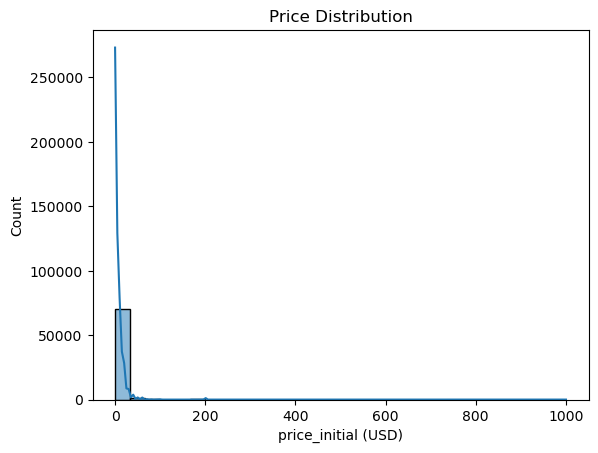

In [12]:
sns.histplot(df['price_initial (USD)'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

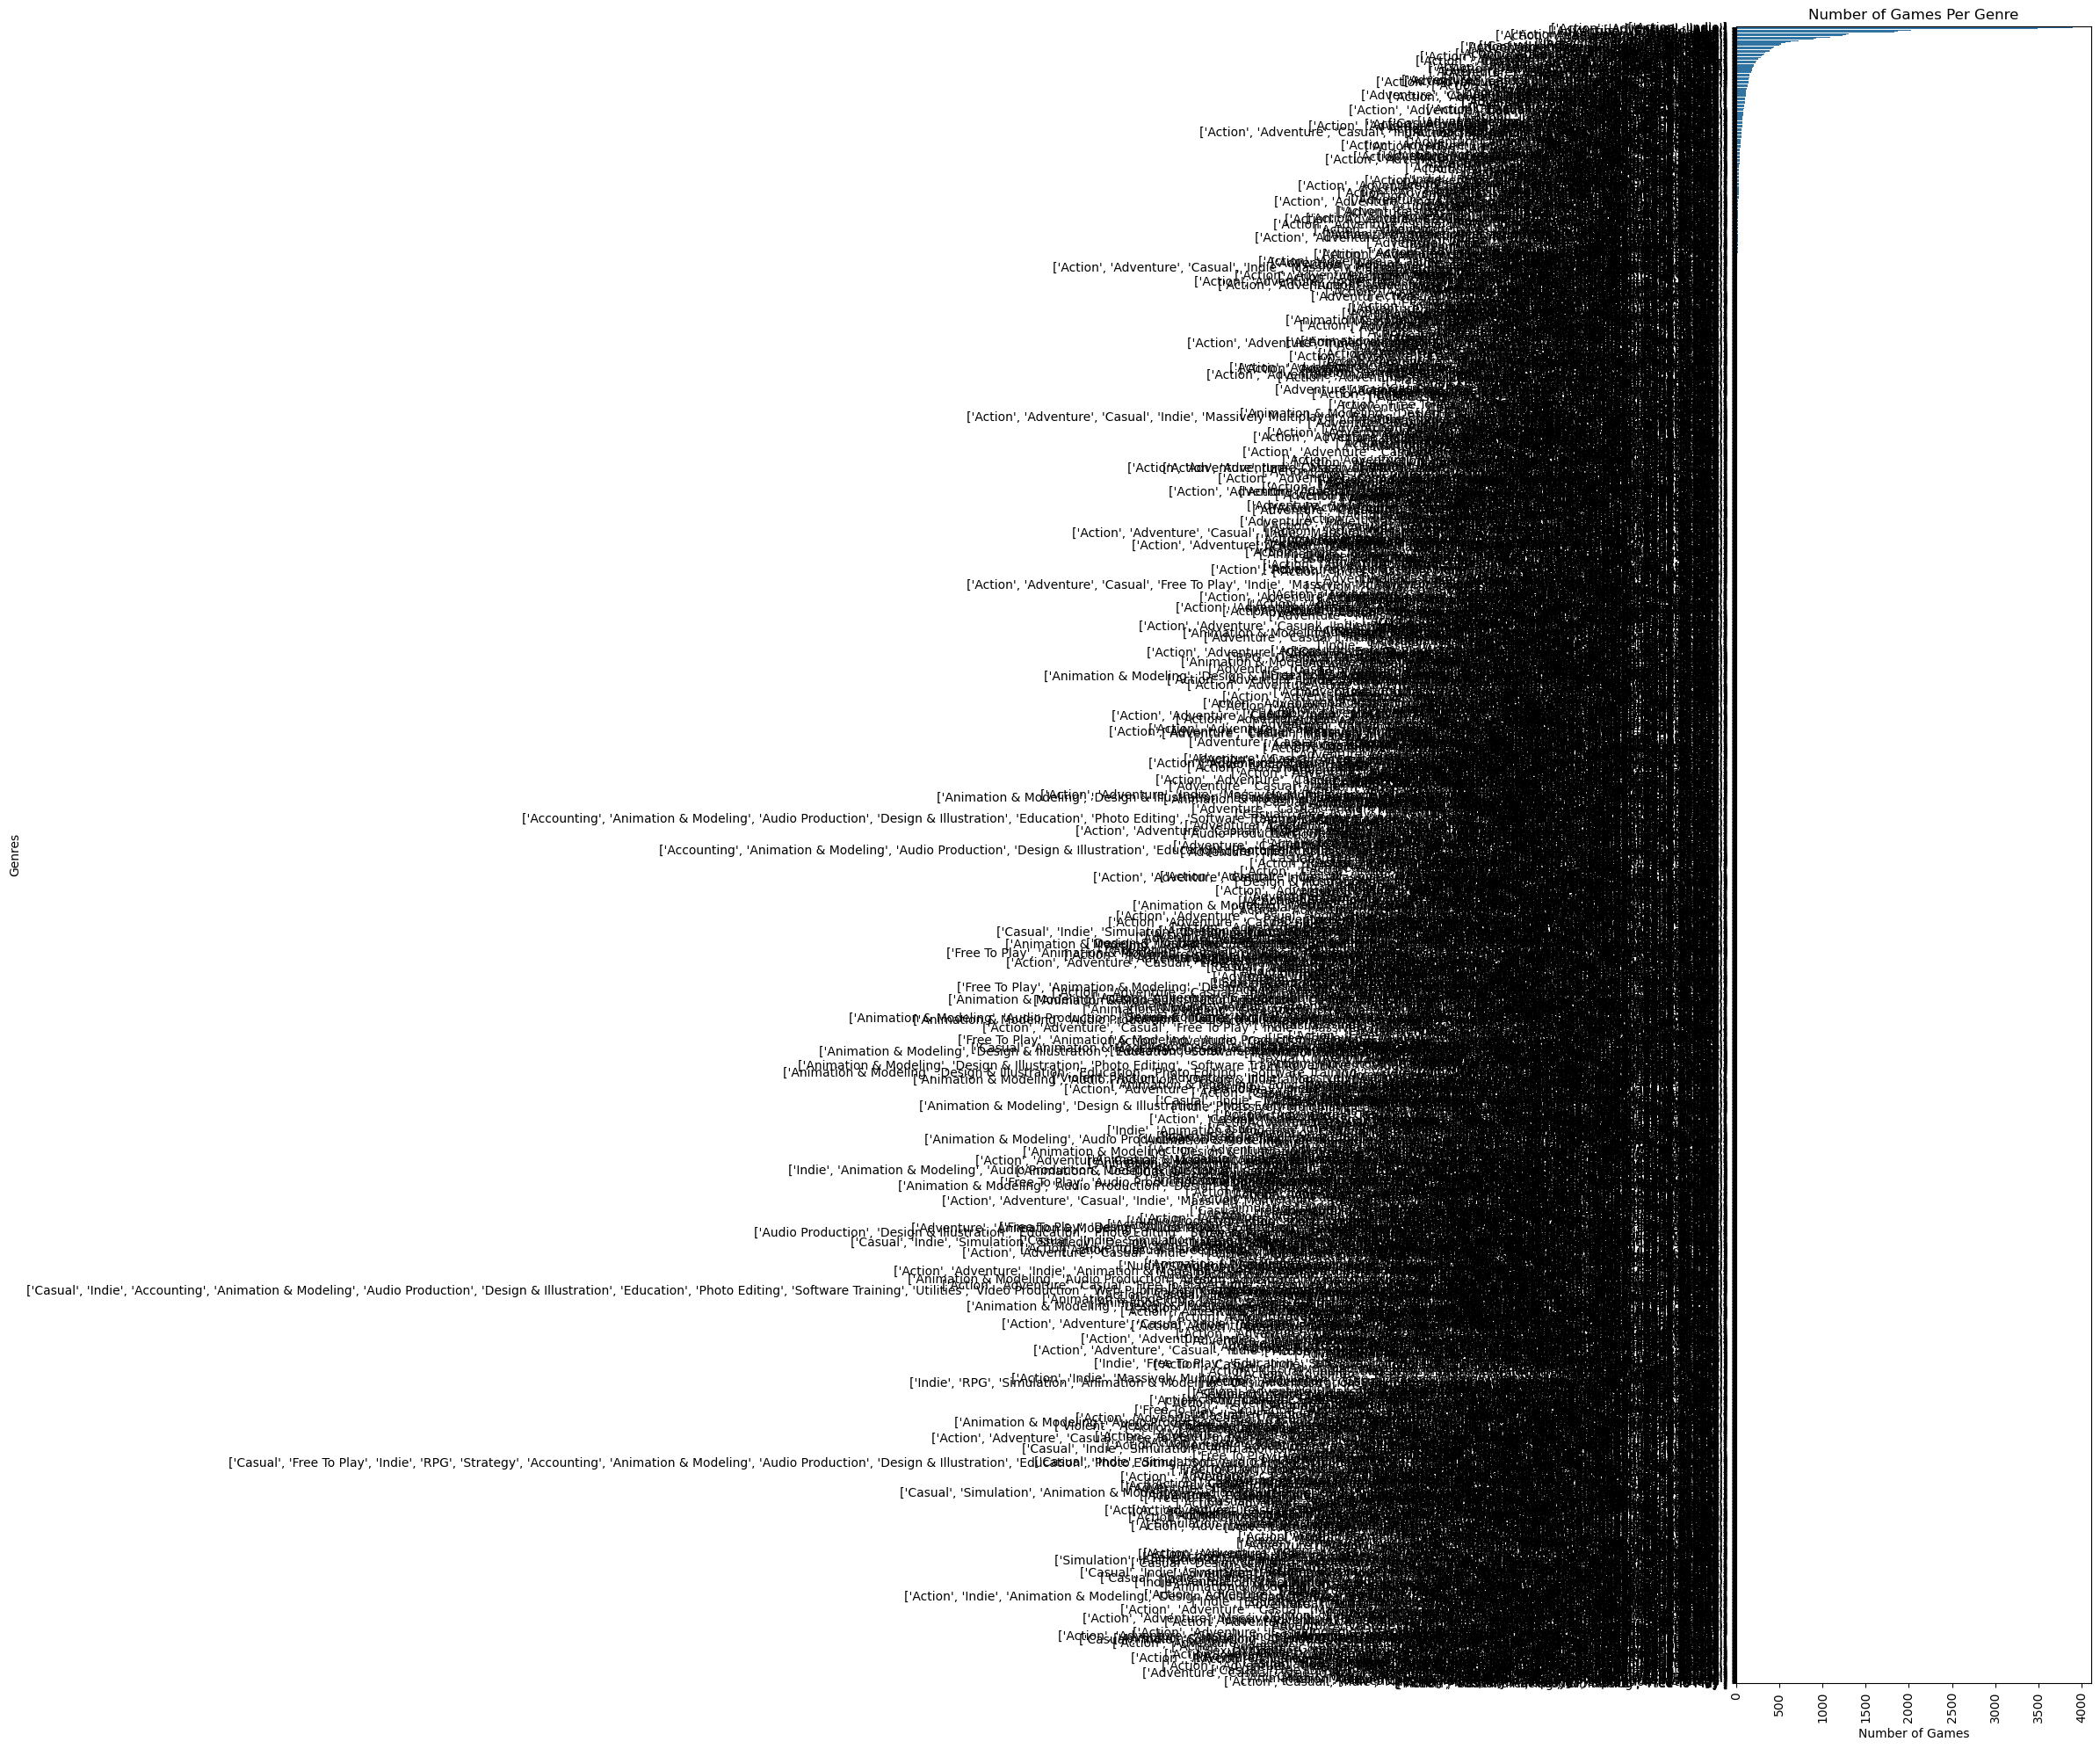

In [14]:
plt.figure(figsize=(24,20))

genre_counts = df['genres'].explode().value_counts()
sns.barplot(x=genre_counts, y=genre_counts.index)
plt.xticks(rotation=90)
plt.title('Number of Games Per Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()

Game Popularity Analysis

Top 10 most reviewed games


In [20]:
top_reviewed = df.sort_values('total_reviews', ascending=False).head(10)
print(top_reviewed[['name', 'total_reviews']])

                                  name  total_reviews
65008                 Counter-Strike 2        1279700
41345  Tom Clancy's Rainbow Six® Siege         571834
63866               Grand Theft Auto V         551680
26364                         Terraria         543537
60099                    HELLDIVERS™ 2         543217
64587                             Rust         475673
64908                  Baldur's Gate 3         388098
63937                         Among Us         359516
54234                   Stardew Valley         339059
68875                   Cyberpunk 2077         318186


Relationship between positive and negative reviews

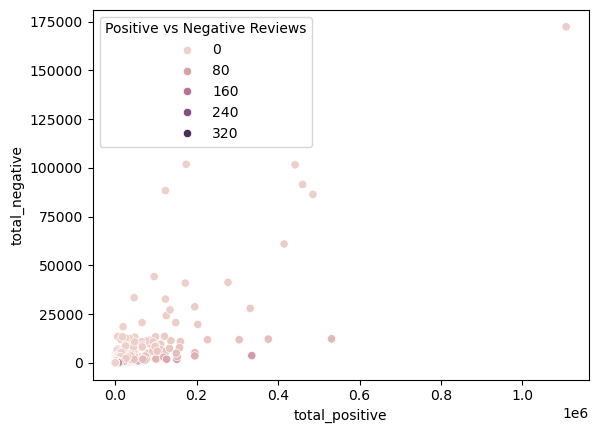

In [22]:
# Create a new column 'Positive vs Negative Reviews' based on the ratio of positive to negative reviews
df['Positive vs Negative Reviews'] = df['total_positive'] / (df['total_negative'] + 1)  # Adding 1 to avoid division by zero

# Plot the scatter plot
sns.scatterplot(x=df['total_positive'], y=df['total_negative'], hue=df['Positive vs Negative Reviews'])
plt.show()

3: PRICE ANALYSIS

Free vs Paid Games


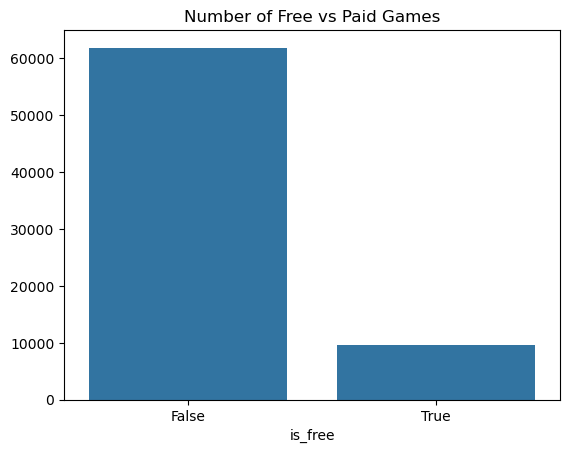

In [23]:
free_vs_paid = df['is_free'].value_counts()
sns.barplot(x=free_vs_paid.index, y=free_vs_paid.values)
plt.title('Number of Free vs Paid Games')
plt.show()

Price vs Positive Reviews

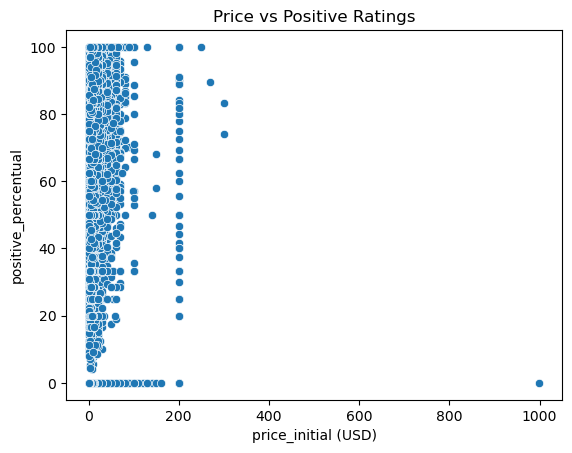

In [27]:
sns.scatterplot(x=df['price_initial (USD)'], y=df['positive_percentual'])
plt.title('Price vs Positive Ratings')
plt.show()

4: Genre and Category Analysis

Average price by genre


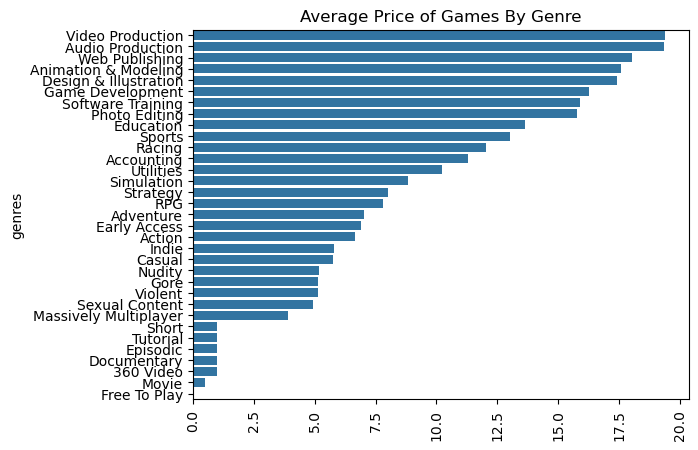

In [30]:
df['genres'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x) #convert string to list
genre_price = df.explode('genres').groupby('genres')['price_initial (USD)'].mean().sort_values(ascending=False)
sns.barplot(x=genre_price.values, y=genre_price.index)
plt.xticks(rotation=90)
plt.title('Average Price of Games By Genre')
plt.show()

Genre vs positive reviews

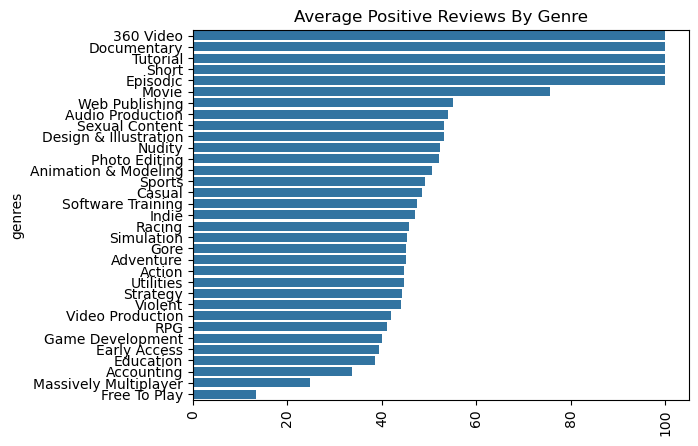

In [32]:
genre_reviews=df.explode('genres').groupby('genres')['positive_percentual'].mean().sort_values(ascending=False)
sns.barplot(x=genre_reviews.values, y=genre_reviews.index)
plt.xticks(rotation=90)
plt.title('Average Positive Reviews By Genre')
plt.show()

5:Developer and Publisher Analysis

Top 10 Devlopers

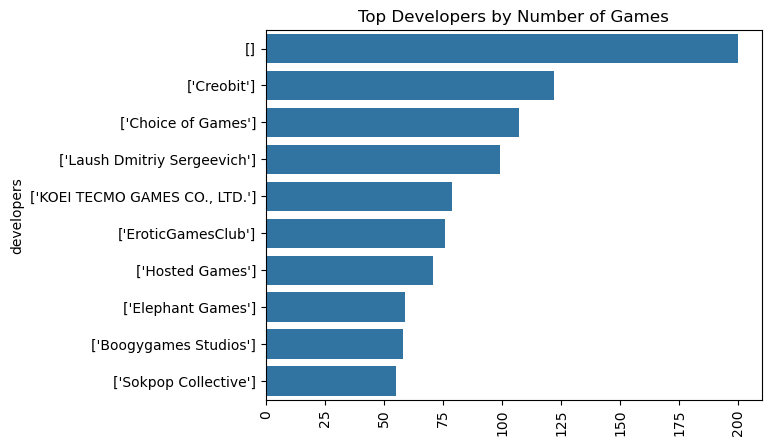

In [34]:
top_devs = df['developers'].explode().value_counts().head(10)
sns.barplot(x=top_devs.values, y=top_devs.index)
plt.xticks(rotation=90)
plt.title('Top Developers by Number of Games')
plt.show()